In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
!pip install utils
from utils import *

In [2]:
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [3]:
white_df=pd.read_csv(URL,sep=';')
white_df['is_red']=0
white_df = white_df.drop_duplicates(keep='first')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


In [4]:
print(white_df.alcohol[0])
print(white_df.alcohol[100])

8.8
9.1


In [5]:
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red_df=pd.read_csv(URL,sep=';')
red_df['is_red']=1
red_df=red_df.drop_duplicates(keep='first')

In [6]:
print(red_df.alcohol[0])
print(red_df.alcohol[100])

9.4
10.2


In [7]:
df=pd.concat([red_df,white_df],ignore_index=True)

In [8]:
df = df.iloc[np.random.permutation(len(df))]

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
722,6.7,0.28,0.28,2.40,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,1
4624,7.2,0.17,0.28,17.55,0.050,33.0,154.0,0.99971,2.94,0.43,9.0,7,0
1339,6.2,0.70,0.15,5.10,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6,1
2697,9.3,0.31,0.49,1.30,0.042,34.0,147.0,0.99480,3.11,0.46,9.8,5,0
2030,6.0,0.18,0.31,1.40,0.036,14.0,75.0,0.99085,3.34,0.58,11.1,8,0


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.255451
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,0.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 722 to 690
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  is_red                5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 581.9 KB


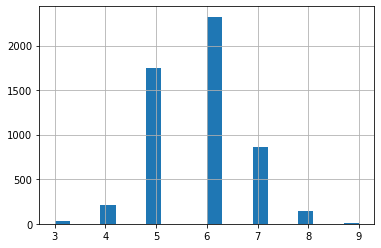

In [12]:
df['quality'].hist(bins=20);

In [13]:
df=df[(df['quality'] > 4) & (df['quality'] < 8)]

In [14]:
df=df.reset_index(drop=True)

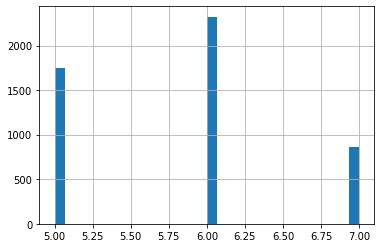

In [15]:
df['quality'].hist(bins=30);

In [16]:
train,test=train_test_split(df,test_size=0.2,random_state=101)

In [17]:
train,val=train_test_split(df,test_size=0.25,random_state=101)

In [18]:
train_stats=train.describe()
train_stats.pop('quality')
train_stats.pop('is_red')

count    3698.000000
mean        0.258518
std         0.437879
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_red, dtype: float64

In [19]:
train_stats=train_stats.transpose()

In [20]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3698.0,7.215279,1.322759,3.80000,6.400000,7.00000,7.700000,15.90000
volatile acidity,3698.0,0.339738,0.163460,0.08000,0.230000,0.29000,0.400000,1.33000
citric acid,3698.0,0.319018,0.144101,0.00000,0.250000,0.31000,0.400000,1.23000
residual sugar,3698.0,5.113115,4.576129,0.60000,1.800000,2.80000,7.600000,65.80000
chlorides,3698.0,0.056458,0.034417,0.00900,0.038000,0.04700,0.067000,0.61100
free sulfur dioxide,3698.0,30.272715,17.132061,1.00000,17.000000,28.00000,41.000000,131.00000
total sulfur dioxide,3698.0,114.894267,56.838195,6.00000,76.000000,117.00000,155.000000,344.00000
density,3698.0,0.994575,0.002995,0.98711,0.992223,0.99471,0.996800,1.03898
pH,3698.0,3.223826,0.158419,2.72000,3.110000,3.21000,3.327500,4.01000
sulphates,3698.0,0.534129,0.143877,0.22000,0.440000,0.51000,0.600000,1.95000


In [21]:
def format_data(data):
  is_red=data.pop('is_red')
  is_red=np.array(is_red)
  quality=data.pop('quality')
  quality=np.array(quality)
  return (quality,is_red)

In [22]:
train_Y = format_data(train)
val_Y = format_data(val)
test_Y = format_data(test)

In [23]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3537,6.4,0.16,0.31,5.3,0.043,42.0,157.0,0.99455,3.35,0.47,10.5
3908,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5
3091,5.2,0.28,0.29,1.1,0.028,18.0,69.0,0.99168,3.24,0.54,10.0
4325,7.9,0.14,0.28,1.8,0.041,44.0,178.0,0.99540,3.45,0.43,9.2
3099,7.6,0.13,0.34,9.3,0.062,40.0,126.0,0.99660,3.21,0.39,9.6


In [24]:
def normalize(x):
  x=x-train_stats['mean']/train_stats['std']
  return x

In [25]:
train_x=normalize(train)
test_x=normalize(test)
val_x=normalize(val)

In [26]:
def base_model(inputs):
  x=Dense(128,activation='relu')(inputs)
  x=Dense(128,activation='relu')(x)
  return x

In [40]:
def final_model(inputs):
    x = base_model(inputs)
    wine_quality = Dense(units='1', name='wine_quality')(x)
    wine_type = Dense(units='1', activation= 'sigmoid', name='wine_type')(x)
    model = Model(inputs= inputs, outputs = [wine_quality, wine_type])
    return model

In [41]:
inputs=tf.keras.Input(shape=(11,))
rms=tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model=final_model(inputs)
model.compile(optimizer=rms, 
              loss = {'wine_type' : 'binary_crossentropy',
                      'wine_quality' : 'mse'
                     },
              metrics = {'wine_type' : 'accuracy',
                         'wine_quality': tf.keras.metrics.RootMeanSquaredError(), 
                       }
             )

In [42]:
history = model.fit(train_x, train_Y,epochs = 180, validation_data=(val_x, val_Y))

Epoch 1/180
116/116 [==============================] - 1s 4ms/step - loss: 3.3659 - wine_quality_loss: 2.5814 - wine_type_loss: 0.7844 - wine_quality_root_mean_squared_error: 1.6067 - wine_type_accuracy: 0.7493 - val_loss: 1.5804 - val_wine_quality_loss: 1.3423 - val_wine_type_loss: 0.2381 - val_wine_quality_root_mean_squared_error: 1.1586 - val_wine_type_accuracy: 0.9157
Epoch 2/180
116/116 [==============================] - 0s 3ms/step - loss: 2.0842 - wine_quality_loss: 1.8444 - wine_type_loss: 0.2398 - wine_quality_root_mean_squared_error: 1.3581 - wine_type_accuracy: 0.9197 - val_loss: 0.9926 - val_wine_quality_loss: 0.7785 - val_wine_type_loss: 0.2142 - val_wine_quality_root_mean_squared_error: 0.8823 - val_wine_type_accuracy: 0.9246
Epoch 3/180
116/116 [==============================] - 0s 2ms/step - loss: 1.8569 - wine_quality_loss: 1.6261 - wine_type_loss: 0.2309 - wine_quality_root_mean_squared_error: 1.2752 - wine_type_accuracy: 0.9194 - val_loss: 1.8333 - val_wine_quality_l

In [43]:
predictions = model.predict(test_x)
quality_pred = predictions[0]
type_pred = predictions[1]

In [44]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

In [45]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

In [46]:
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

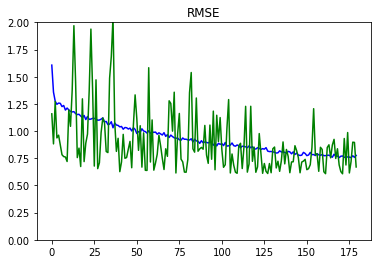

In [47]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

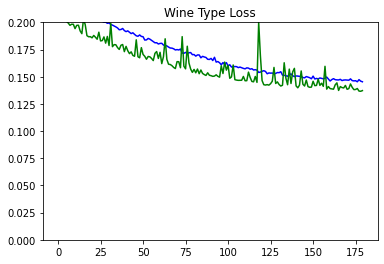

In [48]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

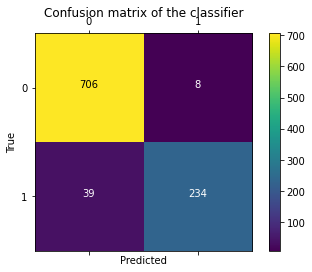

In [49]:
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

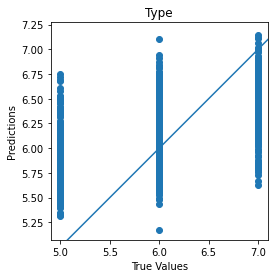

In [50]:
scatter_plot = plot_diff(test_Y[0], quality_pred, title='Type')